<a href="https://colab.research.google.com/github/manlio99/Materia-de-aprendizaje/blob/master/7_FinalProjects/H2O_auto_ML/h2o_automl_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

Esta notebook aun no ha sido optimizada, ni pulida.

Tenemos que utilizar java 8, es uno de los requisitos de H2O, por lo cual, la instalamos y despues la indicamos como preferencia en colab.

In [1]:
!apt-get install openjdk-8-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 15 newly installed, 0 to remove and 21 not upgraded.
Need to get 42.8 MB of archives.
After this 

Ahora la preferncia es java 11

In [2]:
!java -version

openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode)


This command displays Java version.

Make sure it displays openjdk version 1.8.*

If it displays otherwise, (such as openjdk version 10.*) H2O might display an error like this:

<i>H2OServerError: Server process terminated with error code 1</i>

To fix the issue, try this command to change Java version.

```!update-alternatives --config java```

In [3]:
!sudo update-alternatives --set java /usr/lib/jvm/jdk1.8.0_version/bin/java
#!update-alternatives --config java

update-alternatives: error: alternative /usr/lib/jvm/jdk1.8.0_version/bin/java for java not registered; not setting


In [4]:
!java -version

openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode)


Tambien usa una version vieja de pandas.

In [6]:
#!pip install pandas==0.19.2

     |████████████████████████████████| 18.9MB 161kB/s 
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.19.2 which is incompatible.
ERROR: seaborn 0.11.0 has requirement pandas>=0.23, but you'll have pandas 0.19.2 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.19.2 which is incompatible.
ERROR: pandas-datareader 0.9.0 has requirement pandas>=0.23, but you'll have pandas 0.19.2 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.19.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.19.2 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.19.2 which is incompatible.
  Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3


In [ ]:
Instalamos h2o

In [5]:
!pip install H2O

     |████████████████████████████████| 129.4MB 97kB/s 
  Created wheel for H2O: filename=h2o-3.30.1.3-py2.py3-none-any.whl size=129446676 sha256=c2d6e00bf09856661c62c2aaa38943c1195a64fff0b2b4e511621ff97608c69c
  Stored in directory: /root/.cache/pip/wheels/3d/e6/07/53ce9be9cb61b33a79cb3ed1fc39f2dae84f6ee6fe1e373e5e
Successfully built H2O


Iniciamos el servidor.
Prestar atencion a la cantidad de memoria usada, pues se puede modificar.

In [6]:
import h2o
h2o.init()
#memoria limitada a 2gb y 1 hr de entrenamiento

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdhhoyun_
  JVM stdout: /tmp/tmpdhhoyun_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdhhoyun_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_unknownUser_lm7hq3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


### Task 2: Importing Packages

In [7]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from google.colab import files

uploaded = files.upload()
#Subir data


Saving bank_term_deposit_marketing_analysis.xlsx to bank_term_deposit_marketing_analysis.xlsx


### Task 3: Loading and Exploring the Data

In [ ]:
Abrimos los datos y unificamos.

In [9]:
xls = pd.ExcelFile('/content/bank_term_deposit_marketing_analysis.xlsx')

In [10]:
xls.sheet_names
#hojas de excel

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [11]:
#cargamos cada hoja de excel como un dataframe separado
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [12]:
client_info.head()
#verificamos que esten bien cargados

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [13]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [14]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [15]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [16]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])
df.head()
#unimos todos los dataframes en uno solo

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
df = df.drop(['ID'], axis=1)
#eliminamos la columna id porque no aporta informacion

### Task 4: Data Prep & Start H2O

In [18]:
import multiprocessing
multiprocessing.cpu_count()

2

In [19]:
import psutil
psutil.virtual_memory()

svmem(total=13653557248, available=12506042368, percent=8.4, used=937095168, free=7532343296, active=1215623168, inactive=4506918912, buffers=102551552, cached=5081567232, shared=978944, slab=262098944)

In [20]:
#import h2o
from h2o.automl import H2OAutoML

Solo cargar los datos una vez ya han sido limpiados, para optimizar el proceso.

In [21]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [22]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [23]:
train, test = h2o_df.split_frame(ratios=[.75])

# Identify predictors and response
x = train.columns
y = "TERM_DEPOSIT"
x.remove(y)

### Task 5: Run H2O AutoML

In [24]:
from h2o.automl import H2OAutoML

Cuidado estamos limitando la cantidad de tiempo a 10 min, normalmente el tiempo de procesamiento disponible es de una hora. (Lo optimo evidentemente varia dependiendo de nuestro problema)

In [25]:
aml = H2OAutoML(max_runtime_secs=600,
                #exclude_algos=['DeepLearning'],
                seed=1,
                #stopping_metric='logloss',
                #sort_metric='logloss',
                balance_classes=False,
                project_name='Completed'
)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 10s, sys: 1.07 s, total: 1min 11s
Wall time: 9min 30s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [26]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20201027_175100,0.936945,0.21509,0.63728,0.163971,0.254351,0.0646943
XGBoost_grid__1_AutoML_20201027_175100_model_5,0.935899,0.1981,0.628326,0.165915,0.249745,0.0623728
XGBoost_grid__1_AutoML_20201027_175100_model_2,0.934848,0.199949,0.628642,0.163037,0.250478,0.0627395
XGBoost_3_AutoML_20201027_175100,0.934552,0.200607,0.628369,0.157877,0.250969,0.0629855
StackedEnsemble_BestOfFamily_AutoML_20201027_175100,0.934469,0.216973,0.629409,0.176296,0.255451,0.0652551
XGBoost_grid__1_AutoML_20201027_175100_model_1,0.93288,0.203591,0.621237,0.160083,0.253296,0.0641587
GBM_grid__1_AutoML_20201027_175100_model_2,0.932488,0.20547,0.614551,0.169021,0.254042,0.0645371
GBM_grid__1_AutoML_20201027_175100_model_3,0.930948,0.205498,0.620313,0.169706,0.25221,0.0636098
GBM_grid__1_AutoML_20201027_175100_model_1,0.930683,0.206594,0.619074,0.177351,0.252819,0.0639177
XGBoost_grid__1_AutoML_20201027_175100_model_6,0.930013,0.206392,0.611381,0.178934,0.25388,0.0644551


Verificamos el comportamiento de los ensambles de modelos.

In [27]:
# Get the "All Models" Stacked Ensemble model
se = aml.leader

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [28]:
metalearner.varimp()

[('XRT_1_AutoML_20201027_175100',
  0.24106562343934176,
  1.0,
  0.15288378764298394),
 ('DRF_1_AutoML_20201027_175100',
  0.23345433928507084,
  0.9684265054233827,
  0.14805671220298547),
 ('XGBoost_grid__1_AutoML_20201027_175100_model_5',
  0.20081242061909202,
  0.8330197302877634,
  0.12735521154773016),
 ('XGBoost_grid__1_AutoML_20201027_175100_model_2',
  0.1996172772854239,
  0.8280619792960761,
  0.12659725179793024),
 ('GBM_5_AutoML_20201027_175100',
  0.19716789594390194,
  0.8179013379463222,
  0.12504385446349797),
 ('XGBoost_grid__1_AutoML_20201027_175100_model_1',
  0.1781853809226963,
  0.7391571572108965,
  0.11300514585782238),
 ('XGBoost_3_AutoML_20201027_175100',
  0.17317733121944215,
  0.7183825248439787,
  0.10982904137467747),
 ('XGBoost_grid__1_AutoML_20201027_175100_model_3',
  0.06053899658255523,
  0.2511307739313083,
  0.03839382391233234),
 ('XGBoost_grid__1_AutoML_20201027_175100_model_4',
  0.05772562595210867,
  0.2394602147271069,
  0.0366095846172823

### Task 7: Baselearner Model Exploration

Ahora vamos a ver el comportamiento de nuestro mejor submodelo.

In [29]:
model = h2o.get_model('XRT_1_AutoML_20201027_175100')

In [30]:
model.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.06586449201388185
RMSE: 0.25664078400340395
LogLoss: 0.22859486071916196
Mean Per-Class Error: 0.14770814671251642
AUC: 0.9156133889526225
AUCPR: 0.5741703876006906
Gini: 0.8312267779052449

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33036432271966565: 


,,no,yes,Error,Rate
0,no,9182.0,817.0,0.0817,(817.0/9999.0)
1,yes,403.0,850.0,0.3216,(403.0/1253.0)
2,Total,9585.0,1667.0,0.1084,(1220.0/11252.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.330364,0.582192,186.0
1,max f2,0.166529,0.701754,262.0
2,max f0point5,0.467088,0.566021,132.0
3,max accuracy,0.615374,0.905883,83.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000030,1.000000,399.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.241692,0.530801,225.0
8,max min_per_class_accuracy,0.192453,0.847285,247.0
9,max mean_per_class_accuracy,0.166529,0.852292,262.0



Gains/Lift Table: Avg response rate: 11.14 %, avg score: 13.38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010043,0.827986,7.152251,7.152251,0.796460,0.890568,0.796460,0.890568,0.071828,0.071828,615.225053,615.225053,0.069527
1,2,0.020085,0.761527,6.754903,6.953577,0.752212,0.791411,0.774336,0.840989,0.067837,0.139665,575.490328,595.357690,0.134564
2,3,0.030039,0.693711,5.612530,6.509206,0.625000,0.728919,0.724852,0.803853,0.055866,0.195531,461.252993,550.920631,0.186230
3,4,0.040526,0.653846,5.403249,6.223016,0.601695,0.677283,0.692982,0.771101,0.056664,0.252195,440.324915,522.301564,0.238193
4,5,0.052080,0.615385,5.111720,5.976482,0.569231,0.626511,0.665529,0.739024,0.059058,0.311253,411.171957,497.648238,0.291651
5,6,0.100871,0.461538,4.301917,5.166495,0.479053,0.529343,0.575330,0.637602,0.209896,0.521149,330.191729,416.649451,0.472944
6,7,0.150018,0.325273,3.247757,4.537903,0.361664,0.388414,0.505332,0.555966,0.159617,0.680766,224.775692,353.790334,0.597258
7,8,0.200053,0.235596,2.344702,3.989359,0.261101,0.280059,0.444247,0.486959,0.117318,0.798085,134.470167,298.935934,0.672972
8,9,0.300036,0.118591,1.157428,3.045662,0.128889,0.173219,0.339159,0.382410,0.115722,0.913807,15.742839,204.566198,0.690685
9,10,0.403306,0.077035,0.440501,2.378585,0.049053,0.090748,0.264874,0.307727,0.045491,0.959298,-55.949851,137.858474,0.625664


"Significancia" de variables

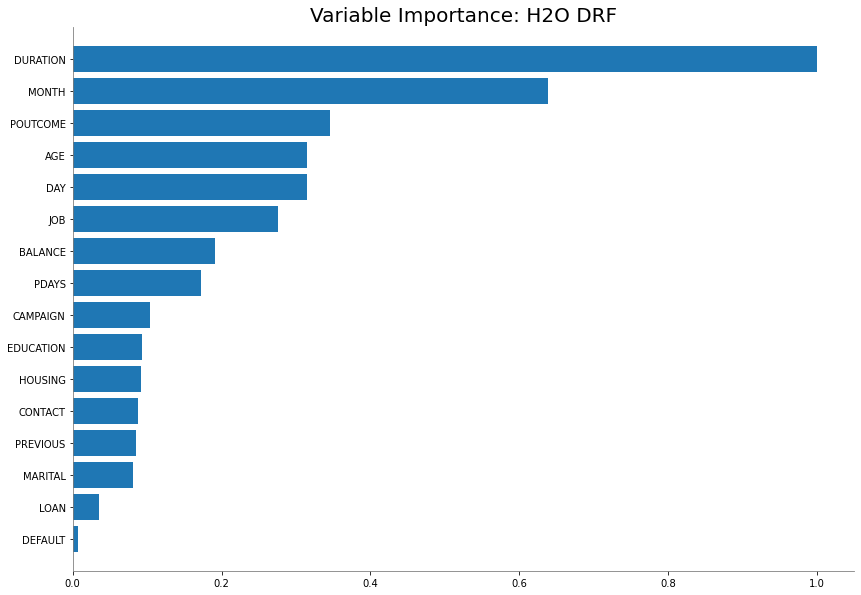

In [31]:
model.varimp_plot(num_of_features=20)

"Significancia local" por variable duracion

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


/usr/local/lib/python3.6/dist-packages/h2o/model/model_base.py:1365: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  axs.fill_between(x, lower, upper, where=lower < upper, alpha=0.1, interpolate=False)


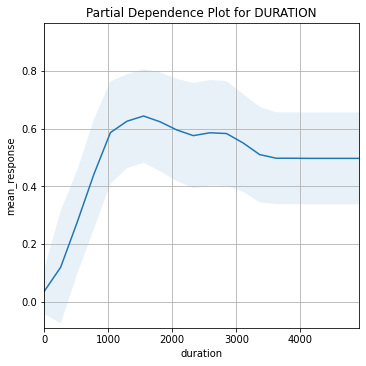

In [32]:
model.partial_plot(train, cols=["DURATION"], figsize=(5,5));

In [ ]:
# save the model
model_path = h2o.save_model(model=model, path='/home/rhyme/Desktop/Project/', force=True)
print(model_path)

### (Optional) Correlation Analysis

In [ ]:
copy = df.copy()
copy.head()

In [ ]:
bin_labels = ['bin1', 'bin2', 'bin3', 'bin4']
copy[['AGE','BALANCE','DAY','DURATION']] = copy[['AGE','BALANCE','DAY','DURATION']].transform(lambda x: pd.qcut(x, q=4, labels=bin_labels))

In [ ]:
copy['CAMPAIGN'] = pd.qcut(copy.CAMPAIGN, q=4, duplicates='drop', labels=bin_labels[:3])

In [ ]:
copy['PDAYS'] = pd.qcut(copy.PDAYS, q=4, duplicates='drop', labels=bin_labels[:1])

In [ ]:
copy['PREVIOUS'] = pd.qcut(copy.PREVIOUS, q=4, duplicates='drop', labels=bin_labels[:1])

In [ ]:
copy.head()

In [ ]:
copy_oh = pd.get_dummies(copy)
copy_oh.head()

In [ ]:
copy_oh.corr()['TERM_DEPOSIT_yes'].sort_values(ascending=False)[1:]

In [ ]:
results, bin_edges = pd.qcut(df.DURATION, q=4, labels=bin_labels, retbins=True)

In [ ]:
bin_edges

In [ ]:
#Strategy: Reach out to customers whose last contact duration was >= 319 or POUTCOME = success